In [ ]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

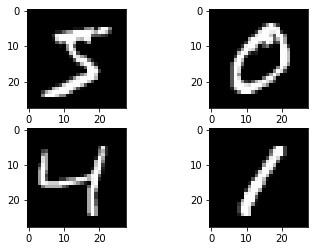

In [ ]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap( "gray" ))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap( "gray" ))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap( "gray" ))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap( "gray" ))
# show the pl

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D
from keras.utils import np_utils

In [ ]:
# flatten 28*28 images to a 784 vector for each image
size=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],size).astype("float")
X_test=X_test.reshape(X_test.shape[0],size).astype("float")

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train=X_train/255
X_test=X_test/255

In [ ]:
y_train[0]

5

In [ ]:
# one hot encode outputs
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_class=y_train.shape[1]

In [ ]:
y_train.shape


(60000, 10)

**Simple ANN**

In [ ]:
def create_model():
  # create model
  model = Sequential()
  model.add(Dense(size, input_dim=size, kernel_initializer= "normal" , activation= "relu" ))
  model.add(Dense(num_class, kernel_initializer= "normal" , activation= "softmax" ))
  # Compile model
  model.compile(loss= "categorical_crossentropy" , optimizer= "adam" , metrics=[ "accuracy" ])
  return model

In [ ]:
model=create_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200,
verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2804 - accuracy: 0.9200 - val_loss: 0.1353 - val_accuracy: 0.9606
Epoch 2/10
 - 1s - loss: 0.1121 - accuracy: 0.9674 - val_loss: 0.0916 - val_accuracy: 0.9723
Epoch 3/10
 - 1s - loss: 0.0713 - accuracy: 0.9794 - val_loss: 0.0846 - val_accuracy: 0.9734
Epoch 4/10
 - 1s - loss: 0.0518 - accuracy: 0.9849 - val_loss: 0.0639 - val_accuracy: 0.9800
Epoch 5/10
 - 1s - loss: 0.0356 - accuracy: 0.9900 - val_loss: 0.0644 - val_accuracy: 0.9796
Epoch 6/10
 - 1s - loss: 0.0264 - accuracy: 0.9927 - val_loss: 0.0617 - val_accuracy: 0.9814
Epoch 7/10
 - 1s - loss: 0.0192 - accuracy: 0.9955 - val_loss: 0.0668 - val_accuracy: 0.9800
Epoch 8/10
 - 1s - loss: 0.0146 - accuracy: 0.9965 - val_loss: 0.0592 - val_accuracy: 0.9824
Epoch 9/10
 - 1s - loss: 0.0107 - accuracy: 0.9979 - val_loss: 0.0630 - val_accuracy: 0.9808
Epoch 10/10
 - 1s - loss: 0.0081 - accuracy: 0.9984 - val_loss: 0.0578 - val_accuracy: 0.9819
Baseline Error: 98.

**Simple CNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,Dropout,Flatten,MaxPooling2D
from keras.utils import np_utils

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

(X_train,y_train) ,(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape(X_train.shape[0],28,28,1).astype("float")
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype("float")

X_train=X_train/255
X_test=X_test/255

In [ ]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)


In [ ]:
num_class=y_test.shape[1]

In [ ]:
def simple_cnn():
  model=Sequential()

  model.add(Convolution2D(32,5,5,border_mode="valid",input_shape=(28,28,1),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(.2))

  model.add(Flatten())
  model.add(Dense(128,activation="relu"))
  model.add(Dense(num_class,activation="softmax"))

  model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
  return model

In [ ]:
model=simple_cnn()

model.fit(X_train,y_train,epochs=10,batch_size=200,validation_data=(X_test,y_test),verbose=2)

score=model.evaluate(X_test,y_test,verbose=0)

print("CNN Error: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.2417 - accuracy: 0.9313 - val_loss: 0.0745 - val_accuracy: 0.9772
Epoch 2/10
 - 1s - loss: 0.0743 - accuracy: 0.9778 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 3/10
 - 1s - loss: 0.0517 - accuracy: 0.9845 - val_loss: 0.0389 - val_accuracy: 0.9877
Epoch 4/10
 - 1s - loss: 0.0399 - accuracy: 0.9880 - val_loss: 0.0373 - val_accuracy: 0.9878
Epoch 5/10
 - 2s - loss: 0.0333 - accuracy: 0.9892 - val_loss: 0.0323 - val_accuracy: 0.9891
Epoch 6/10
 - 1s - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0302 - val_accuracy: 0.9890
Epoch 7/10
 - 1s - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 8/10
 - 1s - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0327 - val_accuracy: 0.9895
Epoch 9/10
 - 1s - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0313 - val_accuracy: 0.9893
Epoch 10/10
 - 2s - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0359 - val_accuracy: 0.9885
CNN Error: 98.19%


**Large cnn**

In [ ]:
def large_cnn():
  model=Sequential()

  model.add(Convolution2D(32,5,5,border_mode="valid",input_shape=(28,28,1),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(20,3,3,border_mode="valid",activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(.2))

  model.add(Flatten())
  model.add(Dense(128,activation="relu"))
  model.add(Dense(64,activation="relu"))
  model.add(Dense(num_class,activation="softmax"))

  model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
  return model

In [ ]:
model=large_cnn()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=200,verbose=2)

score=model.evaluate(X_test,y_test,verbose=0)

print("Accuracy : %.2f%% " % (score[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", padding="valid")`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.3738 - accuracy: 0.8869 - val_loss: 0.0734 - val_accuracy: 0.9750
Epoch 2/20
 - 2s - loss: 0.0860 - accuracy: 0.9737 - val_loss: 0.0476 - val_accuracy: 0.9848
Epoch 3/20
 - 2s - loss: 0.0623 - accuracy: 0.9806 - val_loss: 0.0362 - val_accuracy: 0.9877
Epoch 4/20
 - 2s - loss: 0.0513 - accuracy: 0.9839 - val_loss: 0.0333 - val_accuracy: 0.9891
Epoch 5/20
 - 2s - loss: 0.0446 - accuracy: 0.9859 - val_loss: 0.0256 - val_accuracy: 0.9920
Epoch 6/20
 - 2s - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.0255 - val_accuracy: 0.9910
Epoch 7/20
 - 2s - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0305 - val_accuracy: 0.9899
Epoch 8/20
 - 2s - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.0255 - val_accuracy: 0.9916
Epoch 9/20
 - 2s - loss: 0.0278 - accuracy: 0.9906 - val_loss: 0.0311 - val_accuracy: 0.9903
Epoch 10/20
 - 2s - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0277 - val_accuracy: 0.9911
Epoch 11/20
 - 2s -

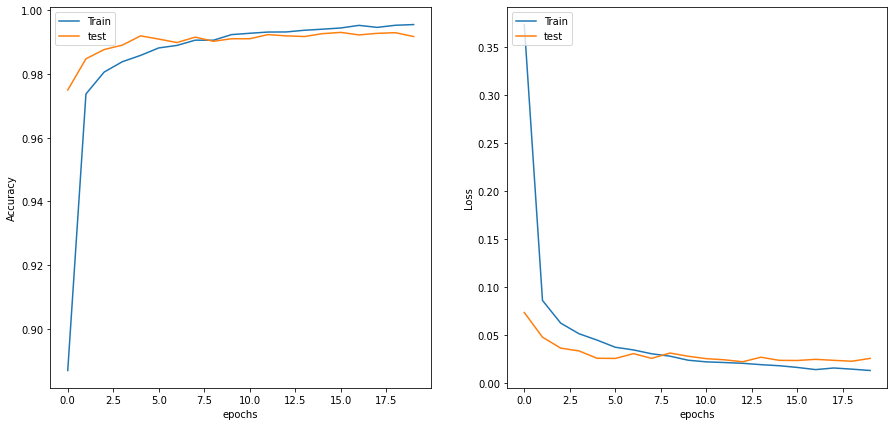

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","test"],loc=2)

plt.subplot(122)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(["Train","test"],loc=2)
plt.show()


